# e. Duke Label Construction - ngdefect 2

**total number of Labels:**
- artifacts (7) + normal (1) + reliability (1) + gdefects (39) + ngdefects (42)
- 7 + 2 + 39 + 42

**Output files (.csv):**

# gdefect1_1hot = pd.concat([label2[["pdf_filename", "normal", "artifact1"]], gdefect1_1hot], axis = 1)

In [1]:
import pandas as pd

In [2]:
label = pd.read_csv('gradings_agreement_labeled.csv')
label2 = pd.read_csv('gradings_agreement_raw.csv')

print("The shape of label is", label.shape)
label.head()

The shape of label is (500, 15)


,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,Yes (reliable),No (abnormal),partial arcuate defect,inferior,none,NaN,none,NaN,none,NaN,none,NaN,none,none
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,Yes (reliable),No (abnormal),partial arcuate defect,inferior,none,NaN,none,NaN,none,NaN,none,NaN,none,none
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,Yes (reliable),Yes (normal),none,NaN,none,NaN,none,NaN,none,NaN,none,NaN,none,none
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,Yes (reliable),Yes (normal),none,NaN,none,NaN,none,NaN,none,NaN,none,NaN,none,none
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,Yes (reliable),No (abnormal),partial arcuate defect,inferior,none,NaN,none,NaN,none,NaN,none,NaN,none,none


In [3]:
label.columns

Index(['pdf_filename', 'reliability', 'normal', 'gdefect1', 'gposition1',
       'gdefect2', 'gposition2', 'gdefect3', 'gposition3', 'ngdefect1',
       'ngposition1', 'ngdefect2', 'ngposition2', 'artifact1', 'artifact2'],
      dtype='object')

# Part 1. One-hot encoding
- ngdefect1
- **ngdefect2**

pd.get_dummies()

### 1. "ngdefect 2"

In [4]:
print(len(label["ngdefect2"].unique()))
label["ngdefect2"].value_counts()

1


none    500
Name: ngdefect2, dtype: int64

### Deal with NaN

In [5]:
label["ngdefect2"] = label["ngdefect2"].fillna("none")   ### although this column has no NaN
label["ngdefect2"].head()

0    none
1    none
2    none
3    none
4    none
Name: ngdefect2, dtype: object

In [6]:
label["ngposition2"] = label["ngposition2"].fillna("none")
label['ngposition2'].head()

0    none
1    none
2    none
3    none
4    none
Name: ngposition2, dtype: object

### Concat gdefect1 and gposition1

In [7]:
label["ngdefect2_loc"] = label["ngdefect2"] + " (" + label['ngposition2'] + ")"
label["ngdefect2_loc"].replace("none (none)", "none", inplace = True)
print("The shape of label is (15+1=16):", label.shape)
label["ngdefect2_loc"].head()

The shape of label is (15+1=16): (500, 16)


0    none
1    none
2    none
3    none
4    none
Name: ngdefect2_loc, dtype: object

In [8]:
print(len(label["ngdefect2_loc"].value_counts()))
label["ngdefect2_loc"].value_counts()

1


none    500
Name: ngdefect2_loc, dtype: int64

In [9]:
500

500

### Make one-hot encoding

In [10]:
ngdefect2_1hot = pd.get_dummies(label['ngdefect2_loc'])
print("The shape of this 1hot is", ngdefect2_1hot.shape)
ngdefect2_1hot.head()

The shape of this 1hot is (500, 1)


,none
0,1
1,1
2,1
3,1
4,1


In [11]:
ngdefect2_1hot.columns

Index(['none'], dtype='object')

In [12]:
l = ['none']
print("The length of this list is", len(l))

The length of this list is 1


# Construct the 35 columns for g-defects:

- 0, none **(1 loc)**
- 1, hemianopia **(7 loc)**
- 2, quadranopia **(7 loc)**
- 3, non-glaucomatous central loss **(7 loc)**
- 4, enlarged blind spot **(7 loc)**
- 5, generalized reduced sensitivity (media opacity) **(7 loc)**


- total: **1 + 5X7 = 1 + 35 = 36**

In [13]:
1 + 5*7

36

In [14]:
l_36 = ["none", 
        
        "hemianopia (none)", "hemianopia (nasal)", "hemianopia (temporal)", 
        "hemianopia (superior nasal)", "hemianopia (inferior nasal)", 
        "hemianopia (superior temporal)", "hemianopia (inferior temporal)", 
        
        "quadranopia (none)", "quadranopia (nasal)", "quadranopia (temporal)", 
        "quadranopia (superior nasal)", "quadranopia (inferior nasal)", 
        "quadranopia (superior temporal)", "quadranopia (inferior temporal)",
        
        "non-glaucomatous central loss (none)", "non-glaucomatous central loss (nasal)", 
        "non-glaucomatous central loss (temporal)", "non-glaucomatous central loss (superior nasal)", 
        "non-glaucomatous central loss (inferior nasal)", "non-glaucomatous central loss (superior temporal)", 
        "non-glaucomatous central loss (inferior temporal)",
        
        "enlarged blind spot (none)", "enlarged blind spot (nasal)", "enlarged blind spot (temporal)", 
        "enlarged blind spot (superior nasal)", "enlarged blind spot (inferior nasal)", 
        "enlarged blind spot (superior temporal)", "enlarged blind spot (inferior temporal)", 
        
        "generalized reduced sensitivity (media opacity) (none)", 
        "generalized reduced sensitivity (media opacity) (nasal)", 
        "generalized reduced sensitivity (media opacity) (temporal)", 
        "generalized reduced sensitivity (media opacity) (superior nasal)", 
        "generalized reduced sensitivity (media opacity) (inferior nasal)", 
        "generalized reduced sensitivity (media opacity) (superior temporal)", 
        "generalized reduced sensitivity (media opacity) (inferior temporal)"
]

ngdefect2_1hot_36 = pd.DataFrame(columns = l_36)
print("The shape is", ngdefect2_1hot_36.shape)
ngdefect2_1hot_36.head()

The shape is (0, 36)


,none,hemianopia (none),hemianopia (nasal),hemianopia (temporal),hemianopia (superior nasal),hemianopia (inferior nasal),hemianopia (superior temporal),hemianopia (inferior temporal),quadranopia (none),quadranopia (nasal),...,enlarged blind spot (inferior nasal),enlarged blind spot (superior temporal),enlarged blind spot (inferior temporal),generalized reduced sensitivity (media opacity) (none),generalized reduced sensitivity (media opacity) (nasal),generalized reduced sensitivity (media opacity) (temporal),generalized reduced sensitivity (media opacity) (superior nasal),generalized reduced sensitivity (media opacity) (inferior nasal),generalized reduced sensitivity (media opacity) (superior temporal),generalized reduced sensitivity (media opacity) (inferior temporal)


### Fill the full 1hot-encoding with the original 1hot-encoding

In [15]:
ngdefect2_1hot_36[l] = ngdefect2_1hot
print("The shape is", ngdefect2_1hot_36.shape)
ngdefect2_1hot_36.head()

The shape is (500, 36)


,none,hemianopia (none),hemianopia (nasal),hemianopia (temporal),hemianopia (superior nasal),hemianopia (inferior nasal),hemianopia (superior temporal),hemianopia (inferior temporal),quadranopia (none),quadranopia (nasal),...,enlarged blind spot (inferior nasal),enlarged blind spot (superior temporal),enlarged blind spot (inferior temporal),generalized reduced sensitivity (media opacity) (none),generalized reduced sensitivity (media opacity) (nasal),generalized reduced sensitivity (media opacity) (temporal),generalized reduced sensitivity (media opacity) (superior nasal),generalized reduced sensitivity (media opacity) (inferior nasal),generalized reduced sensitivity (media opacity) (superior temporal),generalized reduced sensitivity (media opacity) (inferior temporal)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot the defects with loc

Text(0.5, 1.0, 'ngdefect 2 (1 categories)')

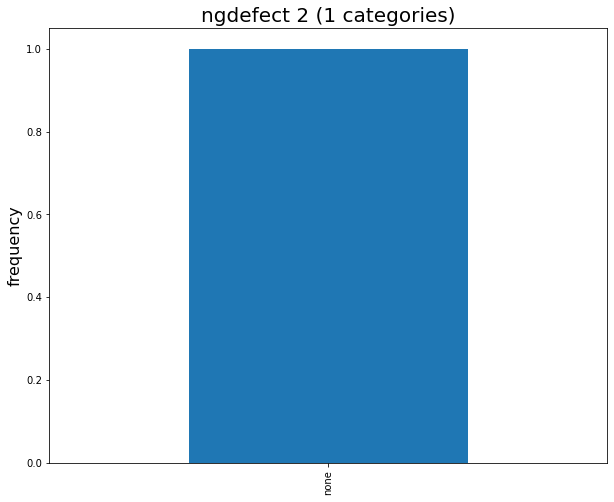

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

ax = (ngdefect2_1hot_36[l].sum()/500).plot(kind='bar')

plt.ylabel('frequency', fontsize = 16)
plt.title('ngdefect 2 (1 categories)', fontsize=20)

In [17]:
ngdefect2_1hot_36.shape

(500, 36)

In [18]:
ngdefect2_1hot_36.to_csv("/Users/yuhuicao/Desktop/2. Duke label construction/5. ngdefect2_1hot_36.csv", index = False)

In [19]:
#### 别跑这个！只是检查而已～
ngdefect2_1hot_36 = ngdefect2_1hot_36.dropna(axis = 1)
ngdefect2_1hot_36.shape

(500, 1)

In [21]:
gdefect1_1hot_35 = pd.concat([label2[["pdf_filename", "normal", "artifact1"]], gdefect1_1hot_35], axis = 1)
print("The shape is", gdefect1_1hot_35.shape)
gdefect1_1hot_35.head()

The shape is (500, 38)


,pdf_filename,normal,artifact1,none,central defect (none),central defect (inferior),central defect (superior),paracentral defect (none),paracentral defect (inferior),paracentral defect (superior),...,generalized constriction (tunnel vision) (none),generalized constriction (tunnel vision) (inferior),generalized constriction (tunnel vision) (superior),generalized reduced sensitivity (none),generalized reduced sensitivity (inferior),generalized reduced sensitivity (superior),total loss of field (none),total loss of field (inferior),total loss of field (superior),unclassifiable (none)
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0,0,NaN,0,0,NaN,0,0,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0,0,NaN,0,0,NaN,0,0,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0,1,NaN,0,0,NaN,0,0,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0,1,NaN,0,0,NaN,0,0,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0,0,NaN,0,0,NaN,0,0,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


**Check**: all "normal" cases are defect1 "none".

In [23]:
print("The number of defect none is", gdefect1_1hot["none"].sum())
gdefect1_1hot[gdefect1_1hot.normal == 1]["none"].value_counts()

The number of defect none is 203


1    185
Name: none, dtype: int64

**Check**: 18 of the defect1 "none" are not "normal". They could have defect2, defect3 , non-g-defect1, non-g-defect2 and artifact1?

In [24]:
print("The number of defect none is", gdefect1_1hot["none"].sum())
gdefect1_1hot[gdefect1_1hot.none == 1]["normal"].value_counts()

The number of defect none is 203


1    185
0     18
Name: normal, dtype: int64

**Check**: 8 of the defect1 "none" have artifact1. The rest of the 10 could be defect2, defect3 , non-g-defect1 and non-g-defect2?

In [25]:
print("The number of defect none is", gdefect1_1hot["none"].sum())
gdefect1_1hot[gdefect1_1hot.none == 1]["artifact1"].value_counts()

The number of defect none is 203


0    195
4      3
2      2
5      2
1      1
Name: artifact1, dtype: int64

**Location info**

In [26]:
print(label["gposition1"].unique())
print(len(label["gposition1"].unique()))
label["gposition1"].value_counts()

['inferior' 'none' 'superior']
3


none        260
inferior    158
superior     82
Name: gposition1, dtype: int64

### 2. "Defect 2"

In [35]:
print(len(label["gdefect2"].unique()))
label["gdefect2"].value_counts()

8


none                               421
nasal step                          30
complete arcuate defect             18
partial arcuate defect              15
central defect                      11
altitudinal defect                   2
paracentral defect                   2
generalized reduced sensitivity      1
Name: gdefect2, dtype: int64

In [36]:
30 + 18 + 15 + 11 + 2 + 2 + 1

79

In [37]:
gdefect2_1hot = pd.get_dummies(label['gdefect2'])
gdefect2_1hot = pd.concat([label2[["pdf_filename", "normal", "artifact1"]], gdefect2_1hot], axis = 1)
print("The shape of this 1hot is", gdefect2_1hot.shape)
gdefect2_1hot.head()

The shape of this 1hot is (500, 11)


,pdf_filename,normal,artifact1,altitudinal defect,central defect,complete arcuate defect,generalized reduced sensitivity,nasal step,none,paracentral defect,partial arcuate defect
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0,0,0,0,0,0,1,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0,0,0,0,0,0,1,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0,0,0,0,0,0,1,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0,0,0,0,0,0,1,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0,0,0,0,0,0,1,0,0


In [38]:
gdefect2_1hot.columns

Index(['pdf_filename', 'normal', 'artifact1', 'altitudinal defect',
       'central defect', 'complete arcuate defect',
       'generalized reduced sensitivity', 'nasal step', 'none',
       'paracentral defect', 'partial arcuate defect'],
      dtype='object')

In [39]:
l = ['altitudinal defect',
       'central defect', 'complete arcuate defect',
       'generalized reduced sensitivity', 'nasal step', 'none',
       'paracentral defect', 'partial arcuate defect']
print("The length of this list is", len(l))

The length of this list is 8


Text(0.5, 1.0, 'defect 2 (8 categories)')

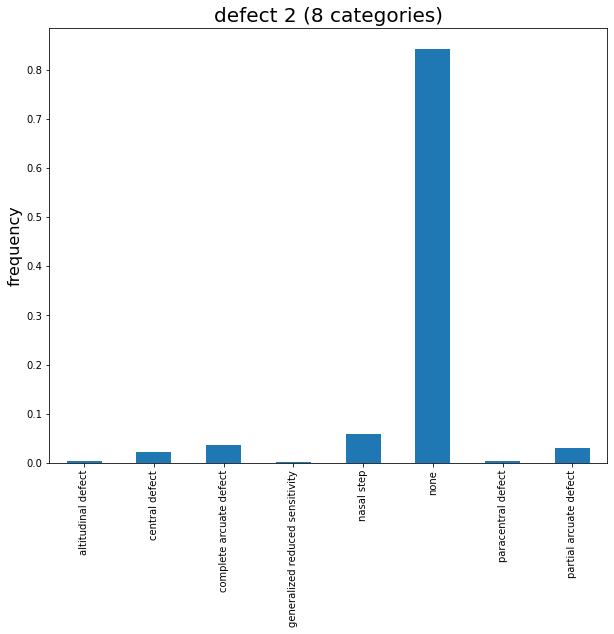

In [40]:
plt.figure(figsize=(10,8))

ax = (gdefect2_1hot[l].sum()/500).plot(kind='bar')

plt.ylabel('frequency', fontsize = 16)
#plt.text(1, 0.71, label2["reliability"].sum()/500, fontsize = 16, color = 'r')   # "353"
plt.title('defect 2 (8 categories)', fontsize=20)

In [41]:
print("The number of defect none is", gdefect2_1hot["none"].sum())
gdefect2_1hot[gdefect2_1hot.normal == 1]["none"].value_counts()

The number of defect none is 421


1    185
Name: none, dtype: int64

In [42]:
print("The number of defect none is", gdefect2_1hot["none"].sum())
gdefect2_1hot[gdefect2_1hot.none == 1]["normal"].value_counts()

The number of defect none is 421


0    236
1    185
Name: normal, dtype: int64

In [43]:
print("The number of defect none is", gdefect2_1hot["none"].sum())
gdefect2_1hot[gdefect2_1hot.none == 1]["artifact1"].value_counts()

The number of defect none is 421


0    413
4      3
2      2
5      2
1      1
Name: artifact1, dtype: int64

**Location info**

In [44]:
print(label["gposition2"].unique())
print(len(label["gposition2"].unique()))
label["gposition2"].value_counts()

[nan 'inferior' 'superior']
3


superior    42
inferior    36
Name: gposition2, dtype: int64

### 3. "Defect 3"

In [45]:
print(len(label["gdefect3"].unique()))
label["gdefect3"].value_counts()

7


none                       486
partial arcuate defect       6
nasal step                   4
temporal wedge               1
complete arcuate defect      1
altitudinal defect           1
paracentral defect           1
Name: gdefect3, dtype: int64

In [46]:
6 + 4 + 1 + 1 + 1 + 1

14

In [47]:
gdefect3_1hot = pd.get_dummies(label['gdefect3'])
gdefect3_1hot = pd.concat([label2[["pdf_filename", "normal", "artifact1"]], gdefect3_1hot], axis = 1)
print("The shape of this 1hot is", gdefect3_1hot.shape)
gdefect3_1hot.head()

The shape of this 1hot is (500, 10)


,pdf_filename,normal,artifact1,altitudinal defect,complete arcuate defect,nasal step,none,paracentral defect,partial arcuate defect,temporal wedge
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0,0,0,0,1,0,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0,0,0,0,1,0,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0,0,0,0,1,0,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0,0,0,0,1,0,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0,0,0,0,1,0,0,0


In [48]:
gdefect3_1hot.columns

Index(['pdf_filename', 'normal', 'artifact1', 'altitudinal defect',
       'complete arcuate defect', 'nasal step', 'none', 'paracentral defect',
       'partial arcuate defect', 'temporal wedge'],
      dtype='object')

In [49]:
l = ['altitudinal defect',
       'complete arcuate defect', 'nasal step', 'none', 'paracentral defect',
       'partial arcuate defect', 'temporal wedge']
print("The length of this list is", len(l))

The length of this list is 7


Text(0.5, 1.0, 'defect 3 (7 categories)')

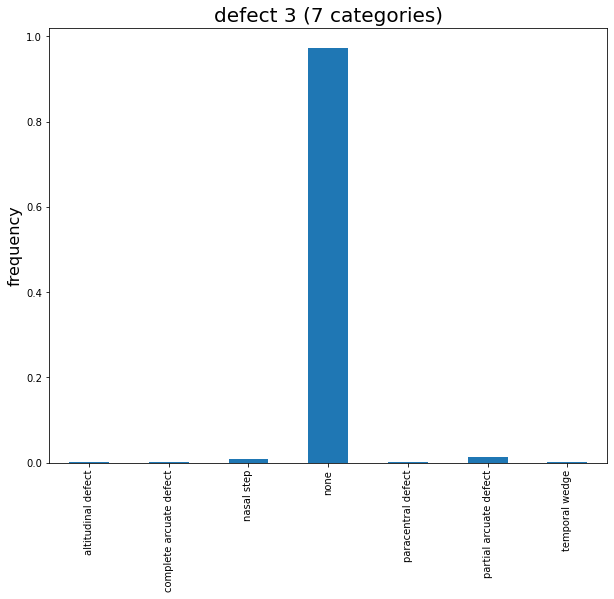

In [50]:
plt.figure(figsize=(10,8))

ax = (gdefect3_1hot[l].sum()/500).plot(kind='bar')

plt.ylabel('frequency', fontsize = 16)
#plt.text(1, 0.71, label2["reliability"].sum()/500, fontsize = 16, color = 'r')   # "353"
plt.title('defect 3 (7 categories)', fontsize=20)

In [51]:
print("The number of defect none is", gdefect3_1hot["none"].sum())
gdefect3_1hot[gdefect3_1hot.normal == 1]["none"].value_counts()

The number of defect none is 486


1    185
Name: none, dtype: int64

In [52]:
print("The number of defect none is", gdefect3_1hot["none"].sum())
gdefect3_1hot[gdefect3_1hot.none == 1]["normal"].value_counts()

The number of defect none is 486


0    301
1    185
Name: normal, dtype: int64

In [53]:
print("The number of defect none is", gdefect3_1hot["none"].sum())
gdefect3_1hot[gdefect3_1hot.none == 1]["artifact1"].value_counts()

The number of defect none is 486


0    478
4      3
2      2
5      2
1      1
Name: artifact1, dtype: int64

**Location info**

In [54]:
print(label["gposition3"].unique())
print(len(label["gposition3"].unique()))
label["gposition3"].value_counts()

[nan 'superior' 'inferior']
3


superior    8
inferior    5
Name: gposition3, dtype: int64

### 4. "non-G Defect 1"

In [55]:
print(len(label["ngdefect1"].unique()))
label["ngdefect1"].value_counts()

5


none                                               478
generalized reduced sensitivity (media opacity)     10
hemianopia                                           6
enlarged blind spot                                  4
non-glaucomatous central loss                        2
Name: ngdefect1, dtype: int64

In [56]:
10 + 6 + 4 + 2

22

In [57]:
ngdefect1_1hot = pd.get_dummies(label['ngdefect1'])
ngdefect1_1hot = pd.concat([label2[["pdf_filename", "normal", "artifact1"]], ngdefect1_1hot], axis = 1)
print("The shape of this 1hot is", ngdefect1_1hot.shape)
ngdefect1_1hot.head()

The shape of this 1hot is (500, 8)


,pdf_filename,normal,artifact1,enlarged blind spot,generalized reduced sensitivity (media opacity),hemianopia,non-glaucomatous central loss,none
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0,0,0,0,0,1
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0,0,0,0,0,1
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0,0,0,0,0,1
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0,0,0,0,0,1
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0,0,0,0,0,1


In [58]:
ngdefect1_1hot.columns

Index(['pdf_filename', 'normal', 'artifact1', 'enlarged blind spot',
       'generalized reduced sensitivity (media opacity)', 'hemianopia',
       'non-glaucomatous central loss', 'none'],
      dtype='object')

In [59]:
l = ['enlarged blind spot',
       'generalized reduced sensitivity (media opacity)', 'hemianopia',
       'non-glaucomatous central loss', 'none']
print("The length of this list is", len(l))

The length of this list is 5


Text(0.5, 1.0, 'non-G-defect 1 (5 categories)')

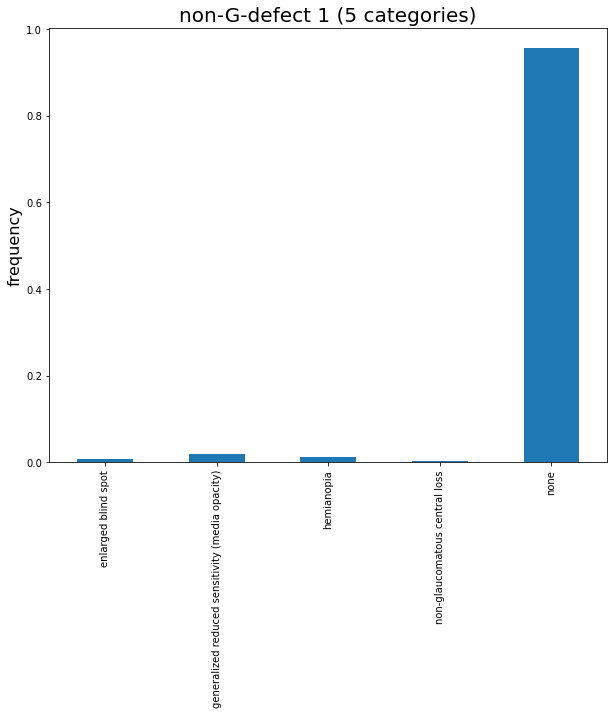

In [60]:
plt.figure(figsize=(10,8))

ax = (ngdefect1_1hot[l].sum()/500).plot(kind='bar')

plt.ylabel('frequency', fontsize = 16)
#plt.text(1, 0.71, label2["reliability"].sum()/500, fontsize = 16, color = 'r')   # "353"
plt.title('non-G-defect 1 (5 categories)', fontsize=20)

In [61]:
print("The number of defect none is", ngdefect1_1hot["none"].sum())
ngdefect1_1hot[ngdefect1_1hot.normal == 1]["none"].value_counts()

The number of defect none is 478


1    185
Name: none, dtype: int64

In [62]:
print("The number of defect none is", ngdefect1_1hot["none"].sum())
ngdefect1_1hot[ngdefect1_1hot.none == 1]["normal"].value_counts()

The number of defect none is 478


0    293
1    185
Name: normal, dtype: int64

In [63]:
print("The number of defect none is", ngdefect1_1hot["none"].sum())
ngdefect1_1hot[ngdefect1_1hot.none == 1]["artifact1"].value_counts()

The number of defect none is 478


0    471
4      3
5      2
2      1
1      1
Name: artifact1, dtype: int64

**Location info**

In [64]:
print(label["ngposition1"].unique())
print(len(label["ngposition1"].unique()))
label["ngposition1"].value_counts()

[nan 'temporal' 'nasal']
3


temporal    4
nasal       2
Name: ngposition1, dtype: int64

### 5. "non-G Defect 2"

In [65]:
print(len(label["ngdefect2"].unique()))
label["ngdefect2"].value_counts()

1


none    500
Name: ngdefect2, dtype: int64

In [66]:
print(label["ngposition2"].unique())
print(len(label["ngposition2"].unique()))
label["ngposition2"].value_counts()

[nan]
1


Series([], Name: ngposition2, dtype: int64)

# Part 2. Save label csv
- gdefect1_1hot
- gdefect2_1hot
- gdefect3_1hot
- ngdefect1_1hot

In [67]:
feature = pd.read_csv("opv_export_masked.csv")
feature.head()

,pdf_filename,opv_filename,maskedid,aedob_shift,aeexamdate_shift,eye,trial_rx_sphere,trial_rx_cylinder,trial_rx_axis,pupil_diameter,...,aeexamtime,test_type,vatype,fovealresult,clinicalnotes,sfstatus,sf,sfprob,cpsd,cpsdprob
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1.2.276.0.75.2.5.80.25.3.190123133923519.93180...,VIP093528,04/18/1959,06/02/2011,L,2.25,-3.0,176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1.2.276.0.75.2.5.80.25.3.190123133924241.93180...,VIP093528,04/18/1959,06/02/2011,R,3.00,-3.0,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1.2.276.0.75.2.5.80.25.3.190123134230637.93180...,VIP059015,12/08/1941,03/28/1998,L,0.00,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1.2.276.0.75.2.5.80.25.3.190123134233302.93180...,VIP059015,12/08/1941,03/28/1998,R,0.75,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1.2.276.0.75.2.5.80.25.3.190123134640210.93180...,VIP099723,02/28/1949,09/30/2012,L,5.25,-1.5,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
feature["pdf_filename"].compare(label["pdf_filename"])

,self,other


In [69]:
feature["pdf_filename"].compare(label2["pdf_filename"])

,self,other


In [72]:
df = label2[["pdf_filename", "normal", "artifact1"]]
print("The shape is ", df.shape)
df.head()

The shape is  (500, 3)


,pdf_filename,normal,artifact1
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0


In [73]:
thr = feature[feature.columns[39:115]]
print("The shape of thr is", thr.shape)
thr.head()

The shape of thr is (500, 76)


,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n15_i21_thr,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr
0,NaN,NaN,NaN,NaN,NaN,28,28,26,29,NaN,...,NaN,11,24,27,29,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,24,26,28,24,NaN,...,NaN,26,26,25,28,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,29,27,24,26,NaN,...,NaN,26,27,26,28,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,25,25,24,24,NaN,...,NaN,28,27,26,26,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,26,22,23,23,NaN,...,NaN,24,26,26,21,NaN,NaN,NaN,NaN,NaN


In [76]:
thr_save = pd.concat([df, thr], axis = 1)
print("The shape of final df is", thr_save.shape)
thr_save.head()

The shape of final df is (500, 79)


,pdf_filename,normal,artifact1,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,...,n15_i21_thr,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,0,0,NaN,NaN,NaN,NaN,NaN,28,28,...,NaN,11,24,27,29,NaN,NaN,NaN,NaN,NaN
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,0,0,NaN,NaN,NaN,NaN,NaN,24,26,...,NaN,26,26,25,28,NaN,NaN,NaN,NaN,NaN
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,0,NaN,NaN,NaN,NaN,NaN,29,27,...,NaN,26,27,26,28,NaN,NaN,NaN,NaN,NaN
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,0,NaN,NaN,NaN,NaN,NaN,25,25,...,NaN,28,27,26,26,NaN,NaN,NaN,NaN,NaN
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,0,0,NaN,NaN,NaN,NaN,NaN,26,22,...,NaN,24,26,26,21,NaN,NaN,NaN,NaN,NaN


In [75]:
thr_save.to_csv("/Users/yuhuicao/Desktop/1. Duke/1. Normal.csv", index = False)